# Hierarchical Bayesian Analysis

In [4]:
#needs to be imported for stan to run on mac
import os
os.environ['MACOSX_DEPLOYMENT_TARGET'] = '10.9'

In [5]:
import pystan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#import csv
trend_data = pd.read_csv('trend2.csv')

In [7]:
#drop NaN from data
trend_data = trend_data.dropna()

In [8]:
trend_data.columns = trend_data.columns.map(str.strip)

In [9]:
#lookup table (dict)
trend_data.country = trend_data.country.str.strip()
trend_countries = trend_data.country.unique()
countries = len(trend_countries)

In [10]:
#create local copies of variables.
country_lookup = dict(zip(trend_countries, range(len(trend_countries))))
country = trend_data['country_code'] = trend_data.country.replace(country_lookup).values

In [11]:
gini_net = trend_data.gini_net.values
rgdpl = trend_data.rgdpl.values
church2 = trend_data.church2.values

In [12]:
my_data = {'N': len(church2),
           'J': countries,
           'country':country+1,
           'x': gini_net,
           'c': rgdpl,
           'y':church2
}

# Stan Model with diffused priors

In [13]:
sm = pystan.StanModel(file = 'my_model.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_de7920bc8c4e3cefd4639cf9fd4e983e NOW.


In [14]:
fit = sm.sampling(data=my_data, iter=2000, chains=2)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [15]:
pystan.check_hmc_diagnostics(fit)

{'n_eff': True,
 'Rhat': True,
 'divergence': True,
 'treedepth': True,
 'energy': True}

In [16]:
print(fit)

Inference for Stan model: anon_model_de7920bc8c4e3cefd4639cf9fd4e983e.
2 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=2000.

              mean se_mean     sd    2.5%     25%    50%    75%  97.5%  n_eff   Rhat
a[1]         17.97    0.66   4.27   10.05   15.03  17.77  20.62  27.81     43   1.02
a[2]         20.99    0.59   4.04   13.64   18.17  20.82  23.52  29.82     47   1.02
a[3]         17.46    0.53   3.56    11.1   14.99  17.25  19.71  25.35     45   1.02
a[4]         -0.66    0.65   4.32   -8.34   -3.69  -0.95   2.03   9.01     45   1.02
a[5]         26.79    0.64   4.48   18.72   23.87  26.59  29.46  36.74     50   1.02
a[6]           9.3     1.1   7.12   -3.39     4.4   9.01  13.52  25.11     42   1.02
a[7]         10.44    0.66   4.57     2.3    7.32  10.09   13.4  19.92     47   1.02
a[8]          5.99    0.54   3.77   -1.01    3.44   5.83   8.27  13.77     49   1.02
a[9]          6.19    0.52   3.51   -0.07     

## Graph of Model

In [17]:
import seaborn as sns

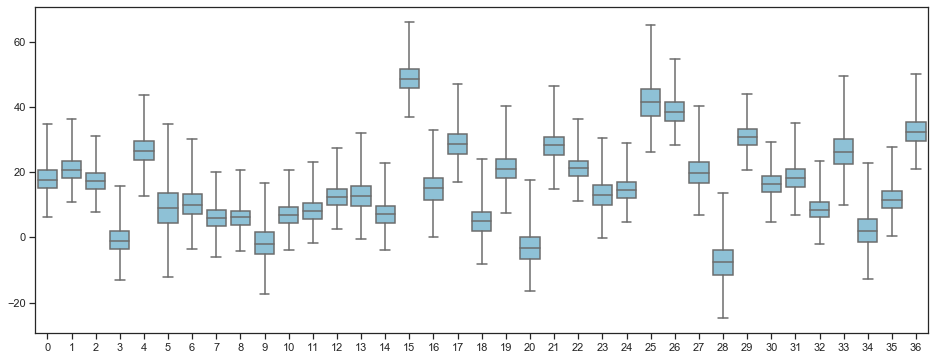

In [18]:
sns.set(style="ticks", palette="muted", color_codes=True)
a_sample = pd.DataFrame(fit['a'])
# Plot the orbital period with horizontal boxes
plt.figure(figsize=(16, 6))
sns.boxplot(data=a_sample, whis=np.inf, color="c")

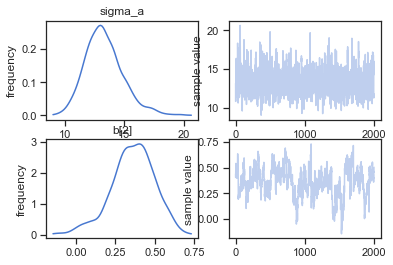

In [19]:
fit.plot(pars=['sigma_a', 'b[2]']);

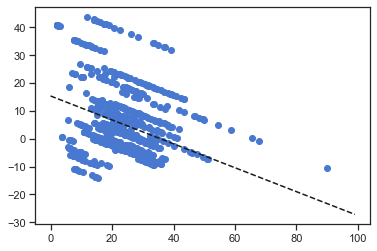

In [20]:
m_means = fit['m'].mean(axis=0)
plt.scatter(rgdpl, m_means)
g0 = fit['mu_a'].mean()
g1 = fit['b'][:, 0].mean()
xvals = np.arange(100)
plt.plot(xvals, g0+g1*xvals, 'k--')

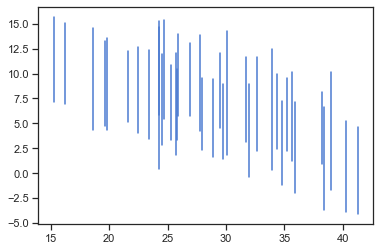

In [21]:
a_means = fit['m'].mean(axis=0)
a_se = fit['a'].std(axis=0)
for c, a, se in zip(rgdpl, a_means, a_se):
    plt.plot([c,c], [a-se, a+se], 'b-')

In [22]:
fit['b[2]'].mean()

0.35984567156841646

# Stan Model with changed prior for beta

In [23]:
sm2 = pystan.StanModel(file = 'my_model_2.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_89dbc91c4f5da13ebea360214609fdf4 NOW.


In [24]:
fit2 = sm2.sampling(data=my_data, iter=2000, chains=2)

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [25]:
pystan.check_hmc_diagnostics(fit2)

{'n_eff': True,
 'Rhat': True,
 'divergence': True,
 'treedepth': True,
 'energy': True}

In [26]:
print(fit2)

Inference for Stan model: anon_model_89dbc91c4f5da13ebea360214609fdf4.
2 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a[1]        18.45    0.42   3.89  10.14  16.01  18.68  21.25  25.19     86   1.02
a[2]        21.44    0.38   3.74  13.57  18.91  21.65  24.12  28.09     96   1.02
a[3]        17.85    0.34   3.21  10.82  15.82  18.06  20.17  23.62     90   1.02
a[4]        -0.24    0.38   3.92  -8.19  -2.84  -0.06   2.47   7.11    105   1.02
a[5]        27.27    0.41   4.15  18.48  24.55  27.57  30.15   34.4    100   1.02
a[6]        10.09    0.65   6.26  -3.06   5.92  10.44  14.46  21.57     93   1.02
a[7]        10.89    0.38   4.23   1.82   8.08  10.93  13.84  18.58    126   1.02
a[8]         6.44    0.35   3.45   -1.0   4.21    6.6   8.88  12.65     97   1.01
a[9]         6.59    0.34    3.2  -0.09   4.53    6.8   8.83  12.24     8

## Graph of the changed model

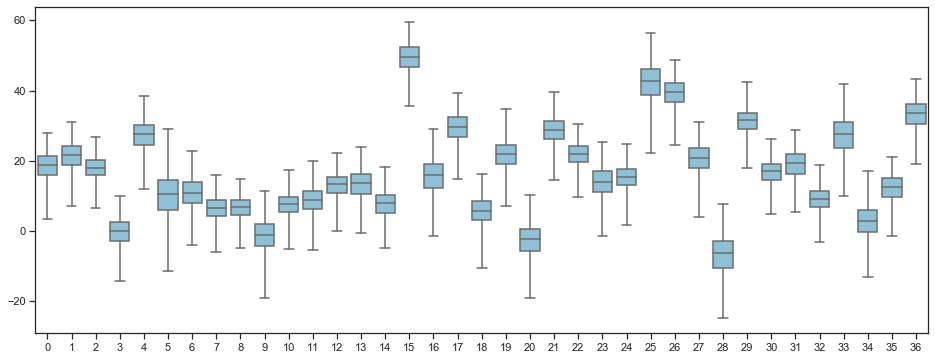

In [27]:
a_sample_2 = pd.DataFrame(fit2['a'])
plt.figure(figsize=(16, 6))
sns.boxplot(data=a_sample_2, whis=np.inf, color="c")

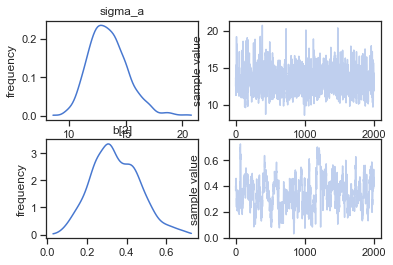

In [28]:
fit2.plot(pars=['sigma_a', 'b[2]']);

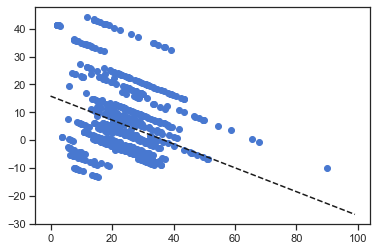

In [29]:
m_means_2 = fit2['m'].mean(axis=0)
plt.scatter(rgdpl, m_means_2)
g0 = fit2['mu_a'].mean()
g1 = fit2['b'][:, 0].mean()
xvals = np.arange(100)
plt.plot(xvals, g0+g1*xvals, 'k--')

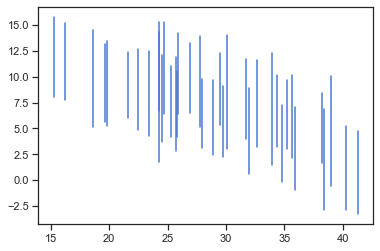

In [30]:
a_means_2 = fit2['m'].mean(axis=0)
a_se_2 = fit2['a'].std(axis=0)
for c, a, se in zip(rgdpl, a_means_2, a_se_2):
    plt.plot([c,c], [a-se, a+se], 'b-')

In [31]:
fit2['b[2]'].mean()

0.34381155265051505

### Q1: How is the posterior different between two models?

I chose normal distribution for the first model for vector beta's prior and switched to cauchy distribution for the second model. The posterior distribution does not seem to be changed much by the choice of beta prior in my models. However, If I had sampled from a binomial distribution in the code with only 2 samples, the posterior distribution would have changed drastically by the choice of the prior distribution.